<a href="https://colab.research.google.com/github/gsalgadod/Mobile-Prices/blob/main/Proyecto_2_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Presentación del Problema

En este segundo proyecto se trabajará con un dataset con información sobre celulares. En particular, se cuenta con información sobre los diferentes componentes de un grupo de celulares. Se busca realizar un modelo de Machine Learning que permita clasificar el rango de precio de los diferentes tipos de celulares con base en sus componentes internos y sus especificaciones.

El conjunto de datos se obtiene de Kaggle en el siguiente link: [Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?resource=download)

Para este proyecto se parte con un dataset que ya ha sido limpiado y ya ha sido dividido entre datos de entrenamiento y testeo. Los datos de entrenamiento cuentan con una columna con un rango de precios, que es la variable a predecir. Por otra parte, los datos de testeo no cuentan con esta columna, pero tienen una columna id. En definitiva, ambos dataframe comparten 20 columnas en total y tienen 2 columnas diferentes. 

El objetivo final es realizar una predicción de los rangos de precio de los datos presentes en el dataframe de testeo.

In [2]:
#Librerías
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')



In [4]:
#Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#Carga de datos
filename = "/content/drive/MyDrive/Coding Dojo/Data Frames/Mobile Prices Train.csv"
df_train = pd.read_csv(filename)
filename2 = "/content/drive/MyDrive/Coding Dojo/Data Frames/Mobile Prices Test.csv"
df_test = pd.read_csv(filename2)
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

Se aprecia que el dataframe tiene 21 columnas (20 características si no se considera el id), en total se tienen 3000 filas, 1000 en los datos de testeo y 2000 en los datos de entrenamiento. No existen valores nulos en ninguno de los dos dataframes.

Adicionalmente, se observa que todas las columnas son numéricas, lo que quiere decir que el dataset ya ha sido transformado y está listo para generar los modelos de clasificación.


#Visualizaciones

Con el objetivo de tener un mejor entendimiento de los datos, se realizará una serie de visualizaciones de las variables. Para realizar esto se utilizará el dataset con datos de entrenamiento, que contiene la variable objetivo a predecir (rango de precios)

In [13]:
df_train["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Se observa que el dataset de entrenamiento está balanceado. 

El primer gráfico que se realizará, es un gráfico de calor con los coeficientes de correlación de las diferentes variables. 

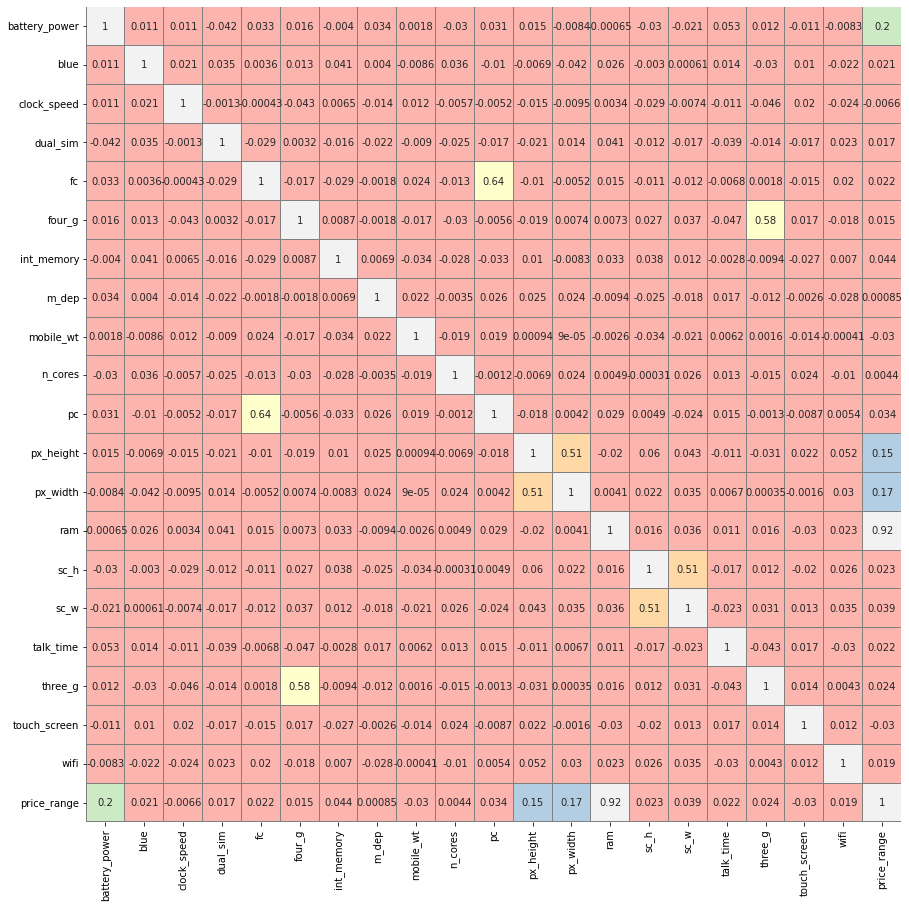

In [19]:
#Primero, se define la correlación entre variables
corr = df_train.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, cmap = "Pastel1", annot = True, cbar = False, linewidths = 0.01,linecolor = "grey", square = True)
plt.show()

Del gráfico anterior, se aprecia que el rango de precio está fuertemente ligado a la ram que cada uno de los celulares tiene. Presentan un coeficiente de correlación de 0.92. 

Adicionalmente, las otras dos variables que presentan coeficiente de correlación mayor que 0.1 es la altura y el ancho de los celulares. 

Lo anterior, permite suponer que el modelo de clasificación se podría hacer con menos variables que las que se tienen en el dataset completo. 

Considerando las variables que mejor se relacionan con price_range, se crearán tres visualizaciones que permitan entender mejor su comportamiento.

In [20]:
df_train["px_height"].value_counts()

347    7
179    6
371    6
275    6
674    5
      ..
87     1
648    1
341    1
993    1
483    1
Name: px_height, Length: 1137, dtype: int64

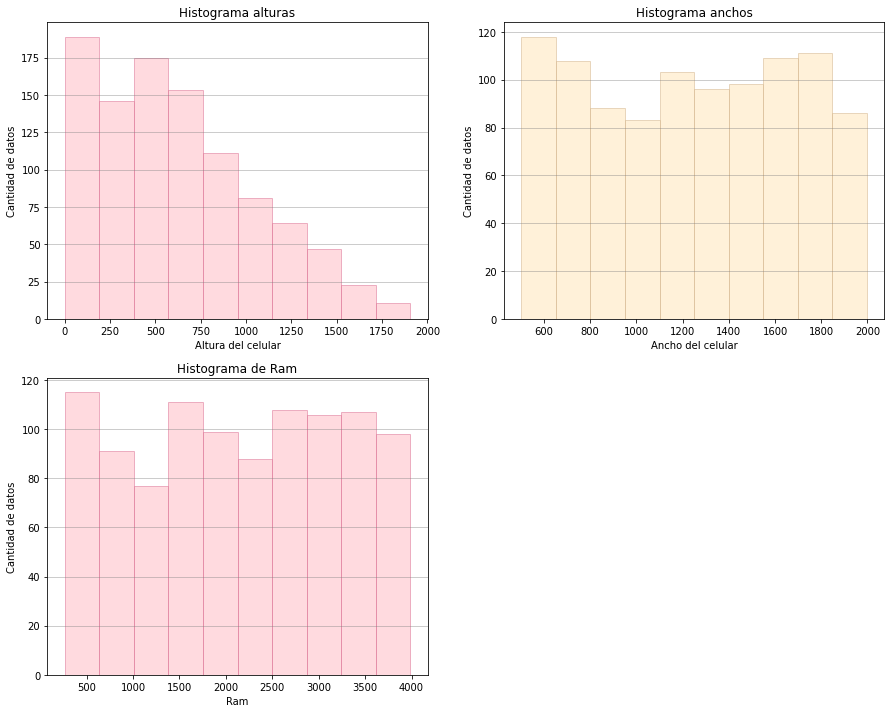

In [22]:
fig1 = plt.figure(figsize=(15,12))
ax1 = fig1.add_subplot(2,2,1)
plt.grid(axis="y", color = "grey", alpha = 0.5)
ax2 = fig1.add_subplot(2,2,2)
plt.grid(axis="y",color = "grey", alpha = 0.5)
ax3 = fig1.add_subplot(2,2,3)
plt.grid(axis="y", color = "grey", alpha = 0.5)


ax1.hist(df["px_height"].values, bins = 10,color= "lightpink", alpha = 0.5, edgecolor = "palevioletred")
ax2.hist(df["px_width"].values, bins = 10, color = "moccasin", alpha = 0.5, edgecolor = "tan")
ax3.hist(df["ram"].values, bins = 10,color= "lightpink", alpha = 0.5, edgecolor = "palevioletred")



ax1.set_xlabel("Altura del celular")
ax1.set_ylabel("Cantidad de datos")
ax1.set_title("Histograma alturas")

ax2.set_xlabel("Ancho del celular")
ax2.set_ylabel("Cantidad de datos")
ax2.set_title("Histograma anchos")

ax3.set_xlabel("Ram")
ax3.set_ylabel("Cantidad de datos")
ax3.set_title("Histograma de Ram")



plt.show()